# Anomaly Detection Project
The dataset contains over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real time applications. Data are ordered, timestamped. All data files contain anomalies, unless otherwise noted. 

In [2]:
import pandas as pd

# Example: Load NYC Taxi data
file_path = 'AnomalyDetection/artificialWithAnomaly/artificialWithAnomaly/art_daily_flatmiddle.csv'
data = pd.read_csv(file_path)
print(data.head())

             timestamp      value
0  2014-04-01 00:00:00 -21.048383
1  2014-04-01 00:05:00 -20.295477
2  2014-04-01 00:10:00 -18.127229
3  2014-04-01 00:15:00 -20.171665
4  2014-04-01 00:20:00 -21.223762


In [3]:
data['value'].value_counts()
#data['timestamp'].value_counts()

value
 40.000000    276
-8.000000      12
-21.048383      1
 85.358457      1
 81.861885      1
             ... 
-19.307010      1
-18.506089      1
-18.906015      1
-18.930821      1
-20.592696      1
Name: count, Length: 3746, dtype: int64

Text(0, 0.5, 'Value')

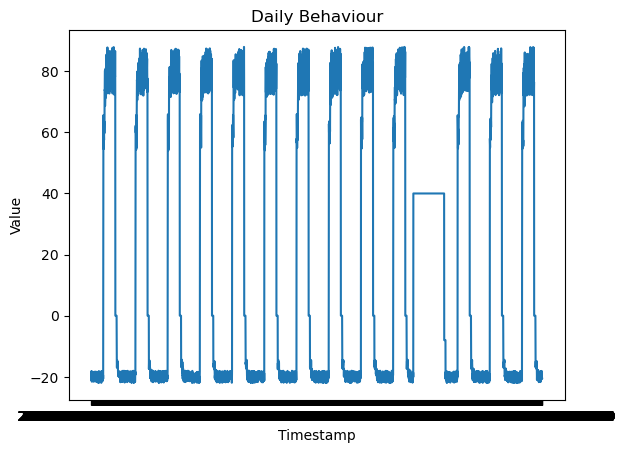

In [4]:
import matplotlib.pyplot as plt

# Visualize NYC Taxi data
plt.plot(data['timestamp'], data['value'])
plt.title('Daily Behaviour')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

# Choose an algorithm to detect anomalies
Isolation Forest

C:\Users\davib\AppData\Local\Temp\ipykernel_29456\433344660.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['value'] = data['value'].fillna(method='ffill')


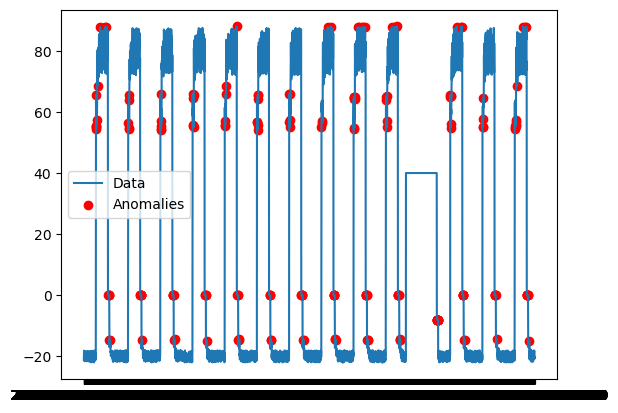

In [5]:
from sklearn.ensemble import IsolationForest

# Prepare data
data['value'] = data['value'].fillna(method='ffill')
values = data['value'].values.reshape(-1, 1)

# Fit Isolation Forest
model = IsolationForest(contamination=0.05, n_estimators=200)
data['anomaly'] = model.fit_predict(values)

# Visualize anomalies
plt.plot(data['timestamp'], data['value'], label='Data')
plt.scatter(data['timestamp'][data['anomaly'] == -1], 
            data['value'][data['anomaly'] == -1], 
            color='red', label='Anomalies')
plt.legend()
plt.show()


In [6]:
data.head()

,timestamp,value,anomaly
0,2014-04-01 00:00:00,-21.048383,1
1,2014-04-01 00:05:00,-20.295477,1
2,2014-04-01 00:10:00,-18.127229,1
3,2014-04-01 00:15:00,-20.171665,1
4,2014-04-01 00:20:00,-21.223762,1


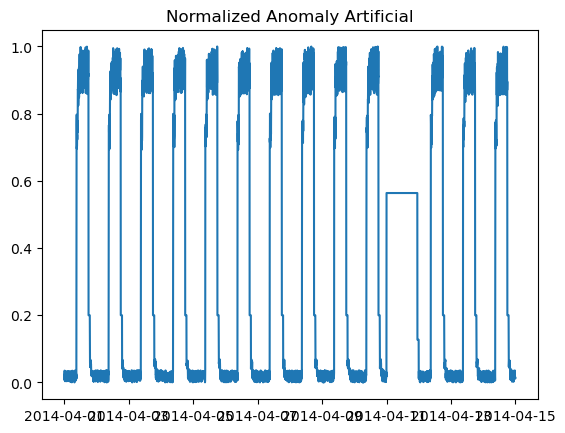

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Normalize the values
scaler = MinMaxScaler()
data['value'] = scaler.fit_transform(data[['value']])

# Plot the data
plt.plot(data.index, data['value'])
plt.title('Normalized Anomaly Artificial')
plt.show()

In [22]:
import os
import pandas as pd

# Directory containing the .csv files
directory = 'AnomalyDetection/artificialNoAnomaly/artificialNoAnomaly'

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        # Read the .csv file
        df = pd.read_csv(file_path)
        # Convert the 'timestamp' column to datetime
        scaler = MinMaxScaler()
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['value'] = scaler.fit_transform(df[['value']])
        # Rename the 'value' column to avoid conflicts
        df.rename(columns={'value': f'value_{filename}'}, inplace=True)
        # Merge the dataframes on 'timestamp'
        if merged_data.empty:
            merged_data = df
        else:
            merged_data = pd.merge(merged_data, df, on='timestamp', how='outer')

# Display the merged DataFrame
print(merged_data.head())

            timestamp  value_art_daily_no_noise.csv  \
0 2014-04-01 00:00:00                           0.0   
1 2014-04-01 00:05:00                           0.0   
2 2014-04-01 00:10:00                           0.0   
3 2014-04-01 00:15:00                           0.0   
4 2014-04-01 00:20:00                           0.0   

   value_art_daily_perfect_square_wave.csv  value_art_daily_small_noise.csv  \
0                                      0.0                         0.004630   
1                                      0.0                         0.056725   
2                                      0.0                         0.008915   
3                                      0.0                         0.056487   
4                                      0.0                         0.055851   

   value_art_flatline.csv  value_art_noisy.csv  
0                     0.0             0.965967  
1                     0.0             0.014809  
2                     0.0             0.481256 

In [23]:
merged_data.head()

,timestamp,value_art_daily_no_noise.csv,value_art_daily_perfect_square_wave.csv,value_art_daily_small_noise.csv,value_art_flatline.csv,value_art_noisy.csv
0,2014-04-01 00:00:00,0.0,0.0,0.004630,0.0,0.965967
1,2014-04-01 00:05:00,0.0,0.0,0.056725,0.0,0.014809
2,2014-04-01 00:10:00,0.0,0.0,0.008915,0.0,0.481256
3,2014-04-01 00:15:00,0.0,0.0,0.056487,0.0,0.333442
4,2014-04-01 00:20:00,0.0,0.0,0.055851,0.0,0.449241


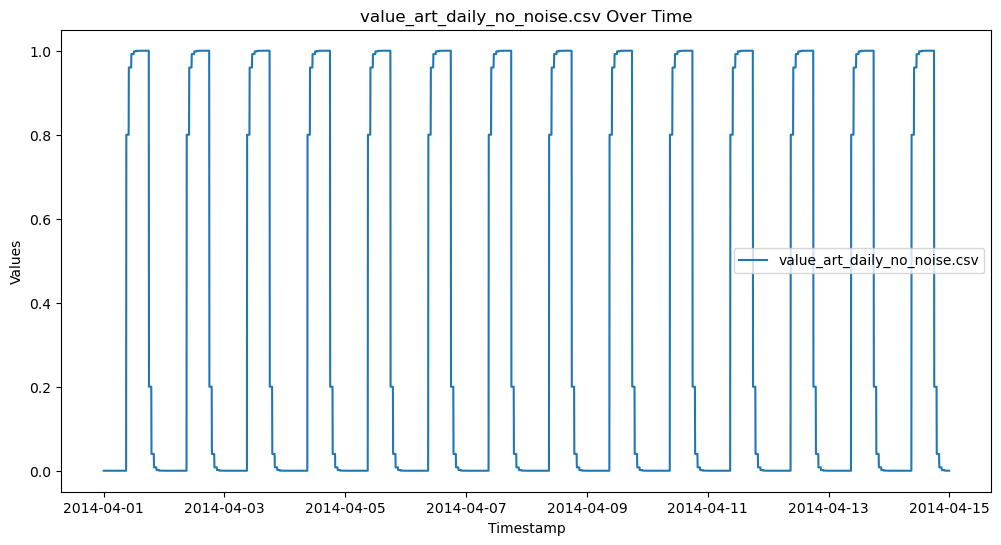

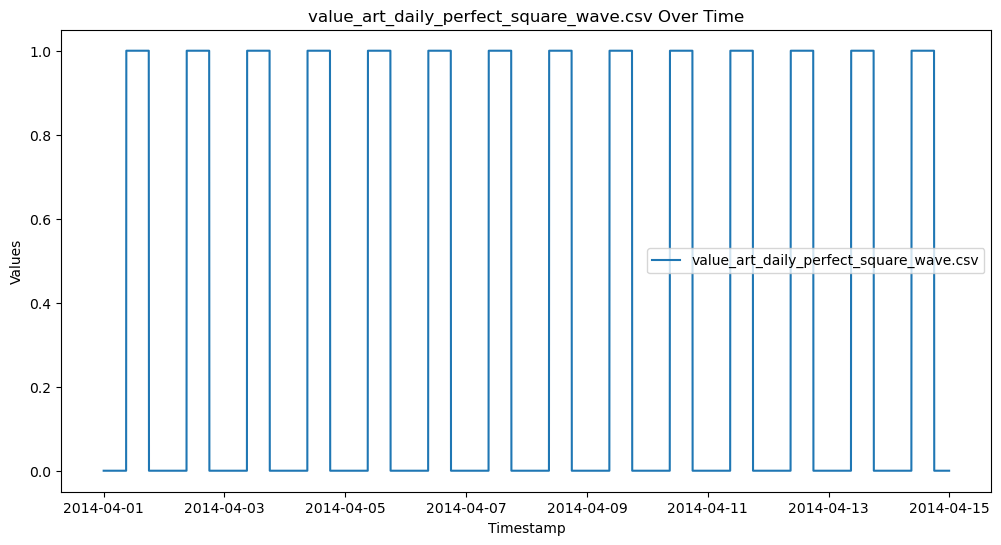

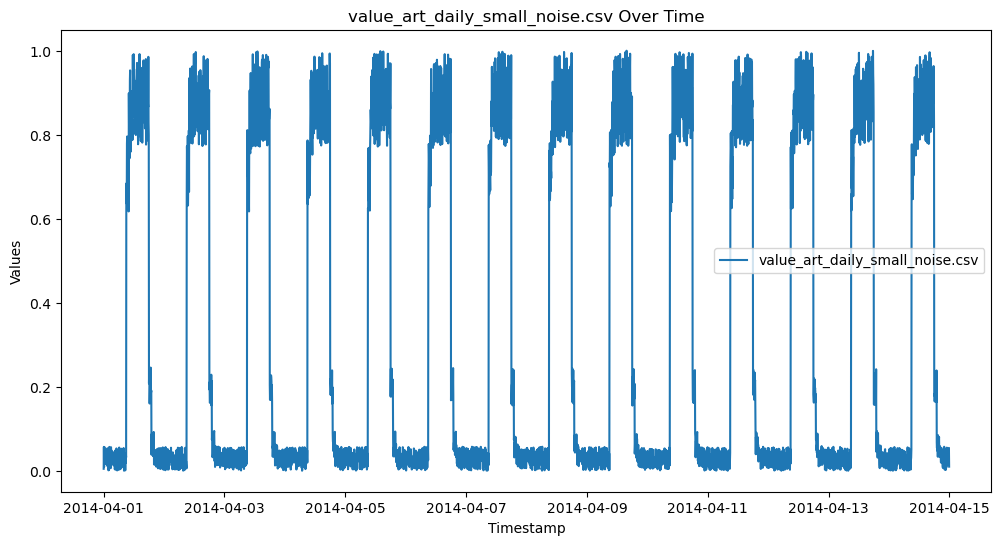

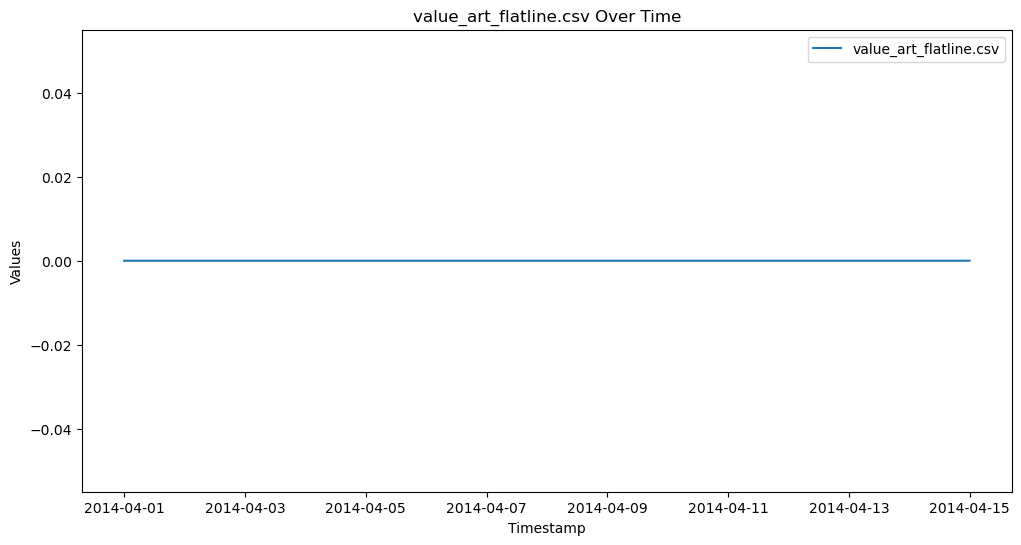

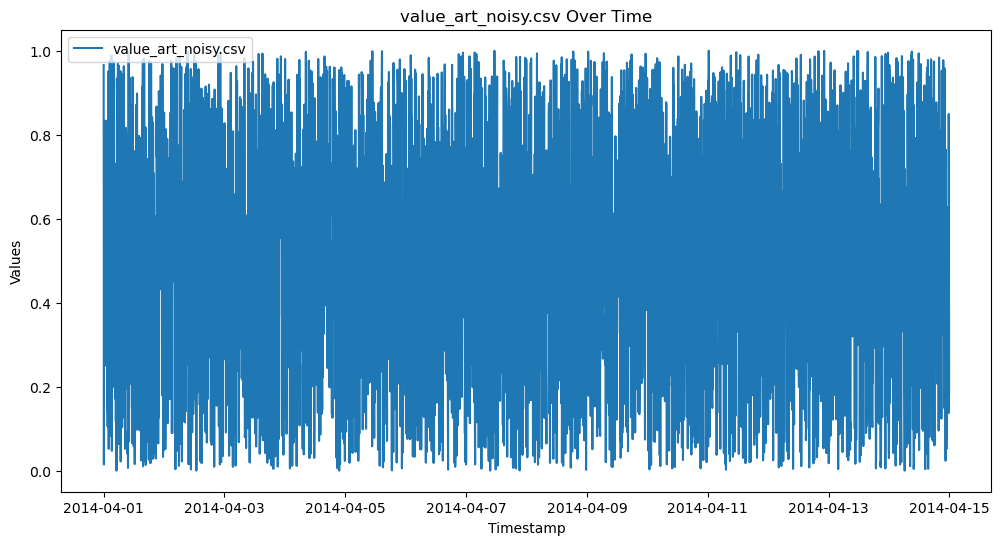

In [24]:
import matplotlib.pyplot as plt

# Set the 'timestamp' column as the index
merged_data.set_index('timestamp', inplace=True)

# Plot each column in the DataFrame in separate plots
for column in merged_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(merged_data.index, merged_data[column], label=column)
    plt.title(f'{column} Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

In [ ]:
no_anomaly = merged_data

In [26]:
import os
import pandas as pd

# Directory containing the .csv files
directory = 'AnomalyDetection/artificialWithAnomaly/artificialWithAnomaly'

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        # Read the .csv file
        df = pd.read_csv(file_path)
        # Convert the 'timestamp' column to datetime
        scaler = MinMaxScaler()
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['value'] = scaler.fit_transform(df[['value']])
        # Rename the 'value' column to avoid conflicts
        df.rename(columns={'value': f'value_{filename}'}, inplace=True)
        # Merge the dataframes on 'timestamp'
        if merged_data.empty:
            merged_data = df
        else:
            merged_data = pd.merge(merged_data, df, on='timestamp', how='outer')

In [27]:
merged_data.head()

,timestamp,value_art_daily_flatmiddle.csv,value_art_daily_jumpsdown.csv,value_art_daily_jumpsup.csv,value_art_daily_nojump.csv,value_art_increase_spike_density.csv,value_art_load_balancer_spikes.csv
0,2014-04-01 00:00:00,0.008643,0.001264,0.011979,0.051413,1.0,0.0
1,2014-04-01 00:05:00,0.015491,0.033685,0.017012,0.018877,0.0,0.0
2,2014-04-01 00:10:00,0.035210,0.044337,0.013342,0.048582,0.0,0.0
3,2014-04-01 00:15:00,0.016617,0.044996,0.023745,0.005337,0.0,0.0
4,2014-04-01 00:20:00,0.007048,0.001930,0.014881,0.002387,0.0,0.0


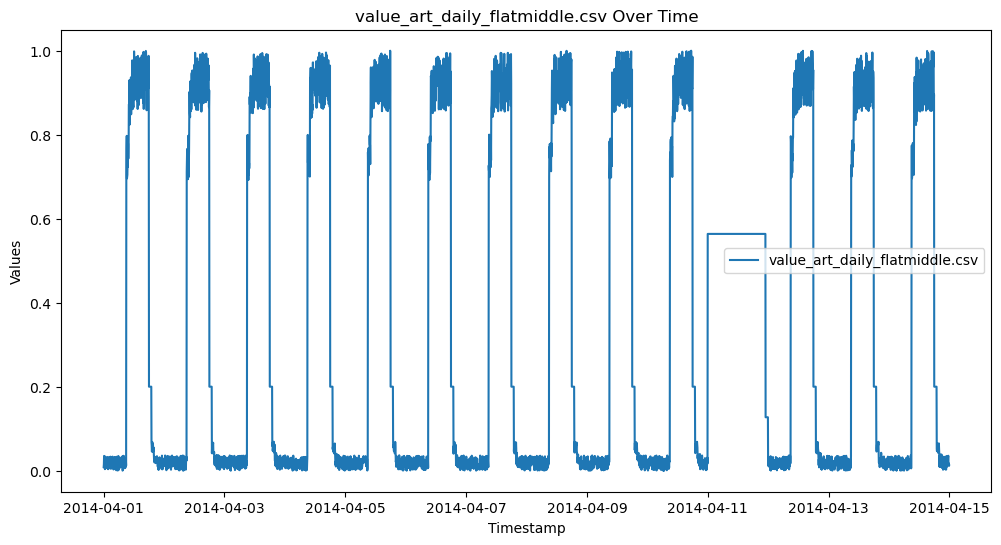

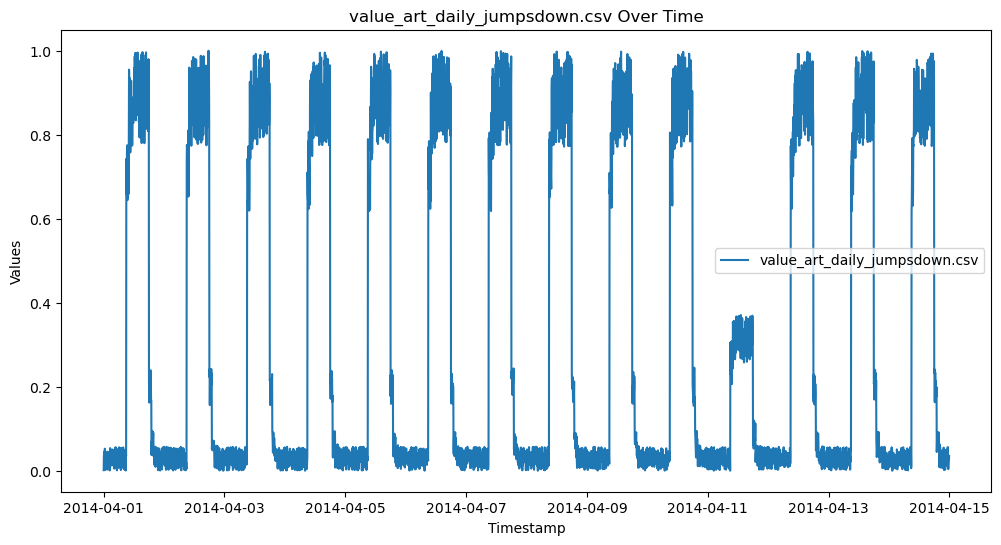

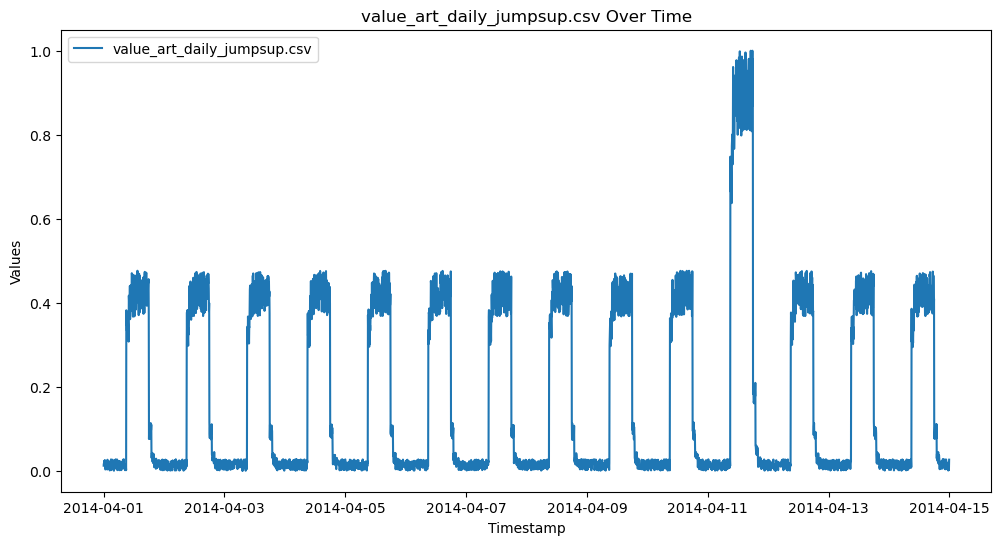

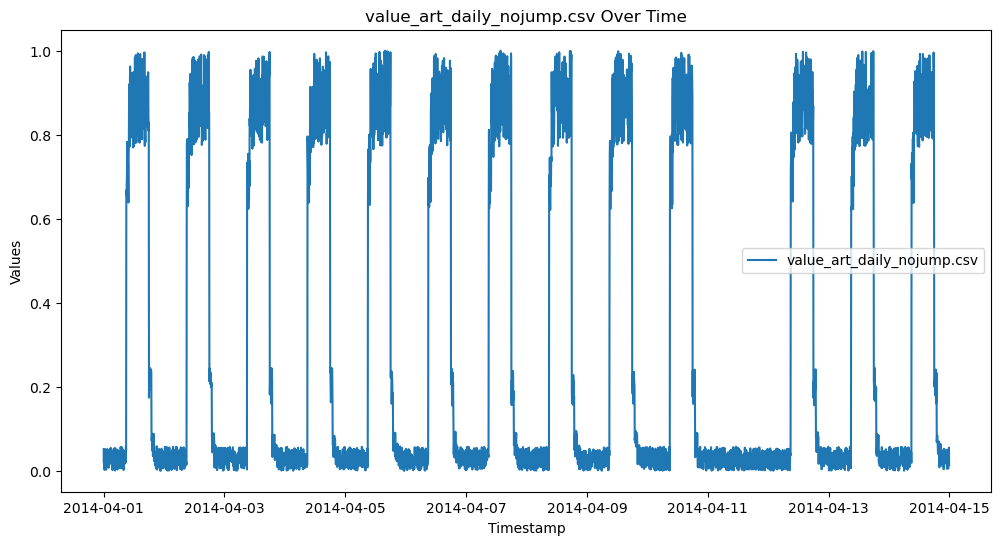

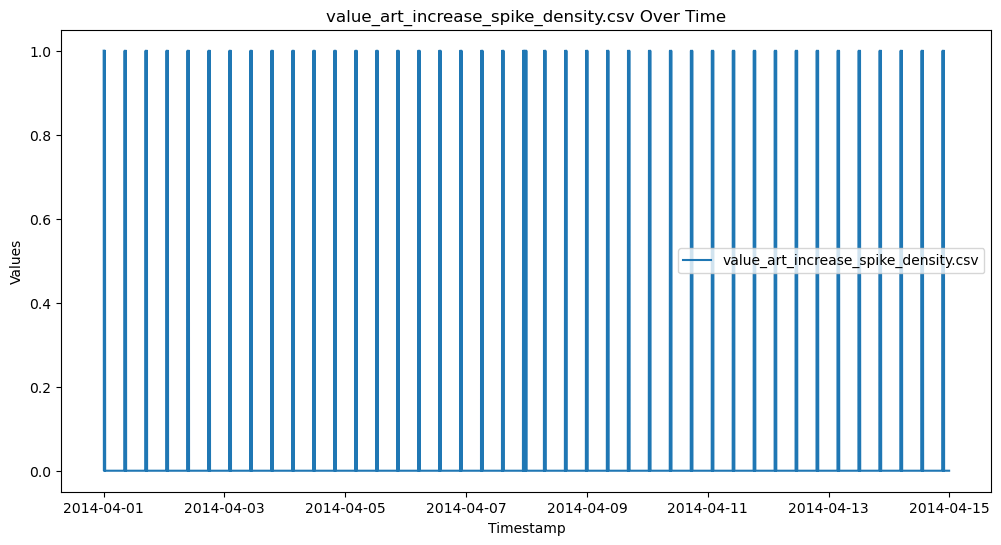

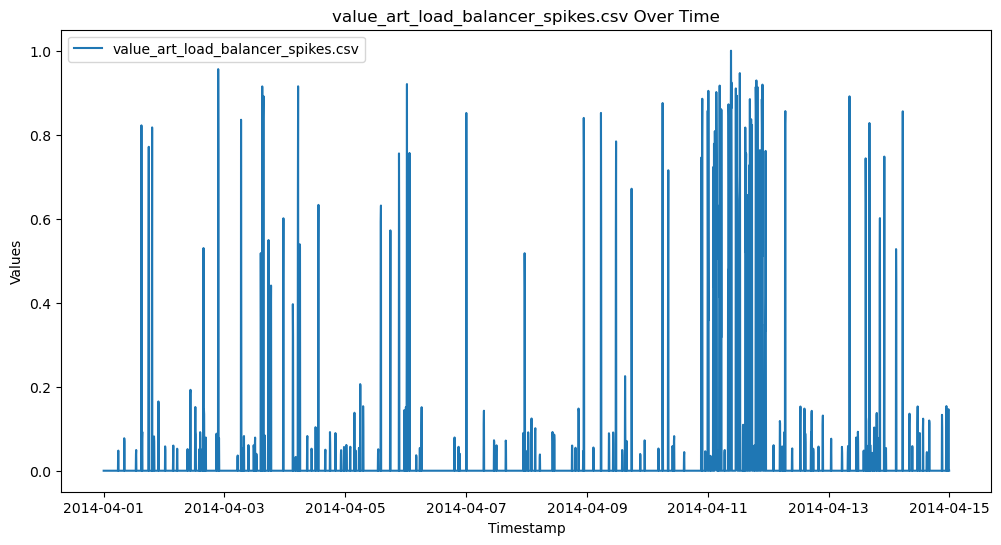

In [28]:
import matplotlib.pyplot as plt

# Set the 'timestamp' column as the index
merged_data.set_index('timestamp', inplace=True)

# Plot each column in the DataFrame in separate plots
for column in merged_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(merged_data.index, merged_data[column], label=column)
    plt.title(f'{column} Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

ValueError: x and y must be the same size

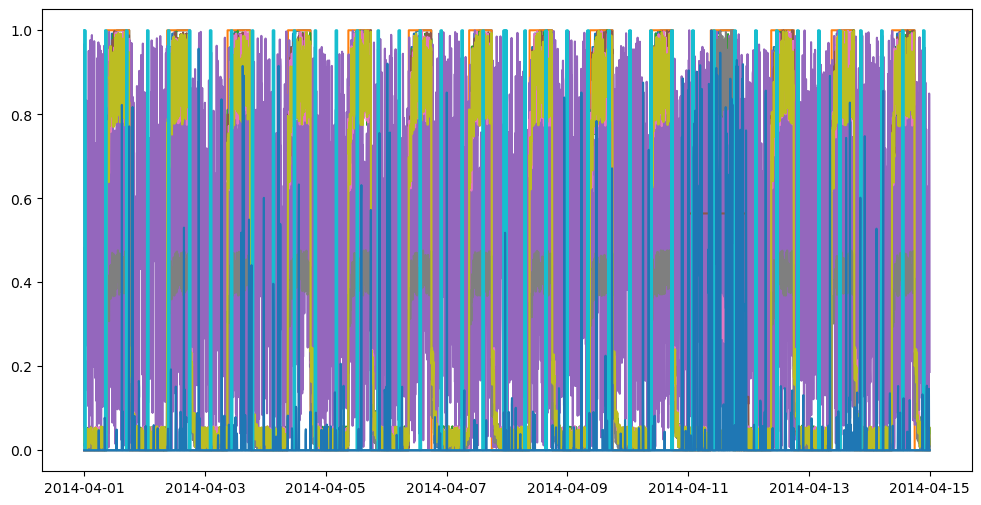

In [30]:
import os
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the no-anomaly dataset
directory_no_anomaly = 'AnomalyDetection/artificialNoAnomaly/artificialNoAnomaly'
merged_no_anomaly = pd.DataFrame()

for filename in os.listdir(directory_no_anomaly):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_no_anomaly, filename)
        df = pd.read_csv(file_path)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        scaler = MinMaxScaler()
        df['value'] = scaler.fit_transform(df[['value']])
        df.rename(columns={'value': f'value_{filename}'}, inplace=True)
        if merged_no_anomaly.empty:
            merged_no_anomaly = df
        else:
            merged_no_anomaly = pd.merge(merged_no_anomaly, df, on='timestamp', how='outer')

# Load and preprocess the anomaly dataset
directory_anomaly = 'AnomalyDetection/artificialWithAnomaly/artificialWithAnomaly'
merged_anomaly = pd.DataFrame()

for filename in os.listdir(directory_anomaly):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_anomaly, filename)
        df = pd.read_csv(file_path)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        scaler = MinMaxScaler()
        df['value'] = scaler.fit_transform(df[['value']])
        df.rename(columns={'value': f'value_{filename}'}, inplace=True)
        if merged_anomaly.empty:
            merged_anomaly = df
        else:
            merged_anomaly = pd.merge(merged_anomaly, df, on='timestamp', how='outer')

# Merge the no-anomaly and anomaly datasets
merged_data = pd.merge(merged_no_anomaly, merged_anomaly, on='timestamp', how='outer', suffixes=('_no_anomaly', '_anomaly'))

# Apply Isolation Forest for anomaly detection
merged_data.set_index('timestamp', inplace=True)
values = merged_data.fillna(0).values  # Fill NaN values with 0 for the algorithm
model = IsolationForest(contamination=0.05, n_estimators=200)
merged_data['anomaly'] = model.fit_predict(values)

# Visualize the anomalies
plt.figure(figsize=(12, 6))
for column in merged_data.columns[:-1]:  # Exclude the 'anomaly' column
    plt.plot(merged_data.index, merged_data[column], label=column)
anomalies = merged_data[merged_data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies.iloc[:, :-1], color='red', label='Anomalies')
plt.title('Anomaly Detection')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

In [32]:
merged_data[merged_data['anomaly']==-1]

,value_art_daily_no_noise.csv,value_art_daily_perfect_square_wave.csv,value_art_daily_small_noise.csv,value_art_flatline.csv,value_art_noisy.csv,value_art_daily_flatmiddle.csv,value_art_daily_jumpsdown.csv,value_art_daily_jumpsup.csv,value_art_daily_nojump.csv,value_art_increase_spike_density.csv,value_art_load_balancer_spikes.csv,anomaly
timestamp,,,,,,,,,,,,
2014-04-01 09:55:00,0.800000,1.0,0.617354,0.0,0.996128,0.769420,0.659150,0.307448,0.750357,0.0,0.000000,-1
2014-04-01 15:00:00,0.999988,1.0,0.896143,0.0,0.333024,0.984286,0.819310,0.401934,0.933538,0.0,0.822259,-1
2014-04-01 17:50:00,1.000000,1.0,0.829052,0.0,0.398186,0.987812,0.979769,0.456151,0.808879,0.0,0.517933,-1
2014-04-01 17:55:00,1.000000,1.0,0.799229,0.0,0.026404,0.888940,0.964049,0.370978,0.829221,0.0,0.771212,-1
2014-04-01 18:05:00,0.200000,0.0,0.242982,0.0,0.976338,0.200067,0.188743,0.107869,0.221259,0.0,0.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-13 18:10:00,0.200000,0.0,0.205013,0.0,0.714273,0.200067,0.169715,0.083695,0.168458,0.0,0.102865,-1
2014-04-13 18:50:00,0.200000,0.0,0.160946,0.0,0.005543,0.200067,0.169252,0.102464,0.185029,0.0,0.000000,-1
2014-04-13 20:20:00,0.008000,0.0,0.006206,0.0,0.431828,0.008626,0.019777,0.004253,0.011694,1.0,0.476541,-1
